### Advertising Data - Example Case

using Python and Scikit-learn to apply logistic regression classification to a fictional case:
- advertising company is testing a specific type of online advertising campaign
- they would like to identify user that would click on a specific new advertising based on their features before playing a the ad
- therfore, they did some testing and recorded the data (see below)

- they try to create a model that will predict whether or not a user will click on an ad based off the features of that user

This data set contains the following features:
- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad


(advertising data is fictional)

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# import data
df = pd.read_csv('advertising.csv')

In [5]:
# view data
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
# exploratory analysis
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


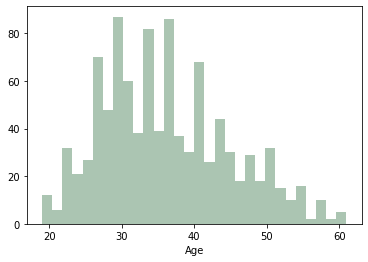

In [24]:
# show 'Age' distribution on a histogram for better overview of customers
sns.distplot(df['Age'], kde=False, color='#2f6f40', bins=30)

Users are mostly of younger age (<40)

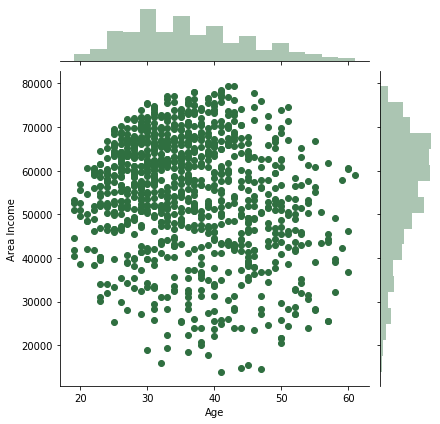

In [31]:
# comparing 'Age' versus 'Area Income'
sns.jointplot(df['Age'],df['Area Income'], color='#2f6f40')

Interestingly, there seems to be no particular strong relationship between 'Age' and 'Area Income' when looking at visualization. Potentially with increase in age you start to move into areas with higher income, but this falls off even later in life.

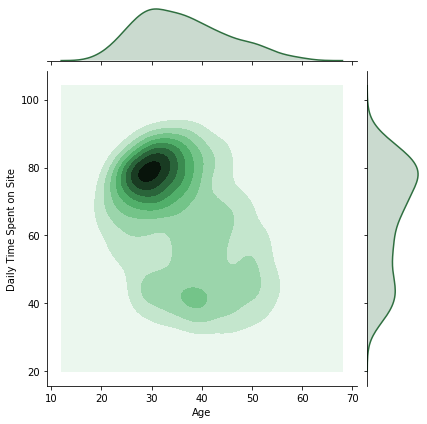

In [32]:
# now focusing on 'Daily Time spent on site' versus 'Age' using kde visualization
sns.jointplot(df['Age'],df['Daily Time Spent on Site'], kind='kde', color='#2f6f40')

A slight relationship between both variables could be interpreted, with higher age correlating with daily less time spent on the site.

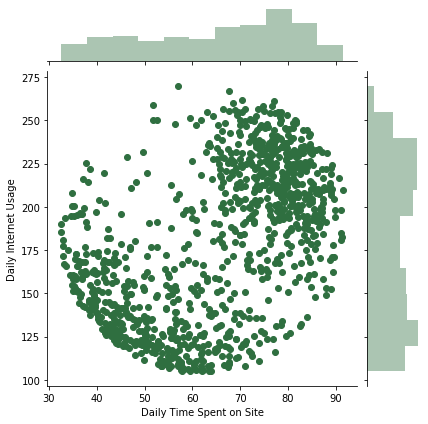

In [34]:
# for last detailed comparison, we compare 'Daily Internet Usage' and 'Daily Time Spent on Site'
sns.jointplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'], color='#2f6f40')

A split among the test user can be observed, thos with less internet usage on a daily basis and low to mid time spent on the site vs. those with high amount of daily internet usage and a lot of time spent on the site.

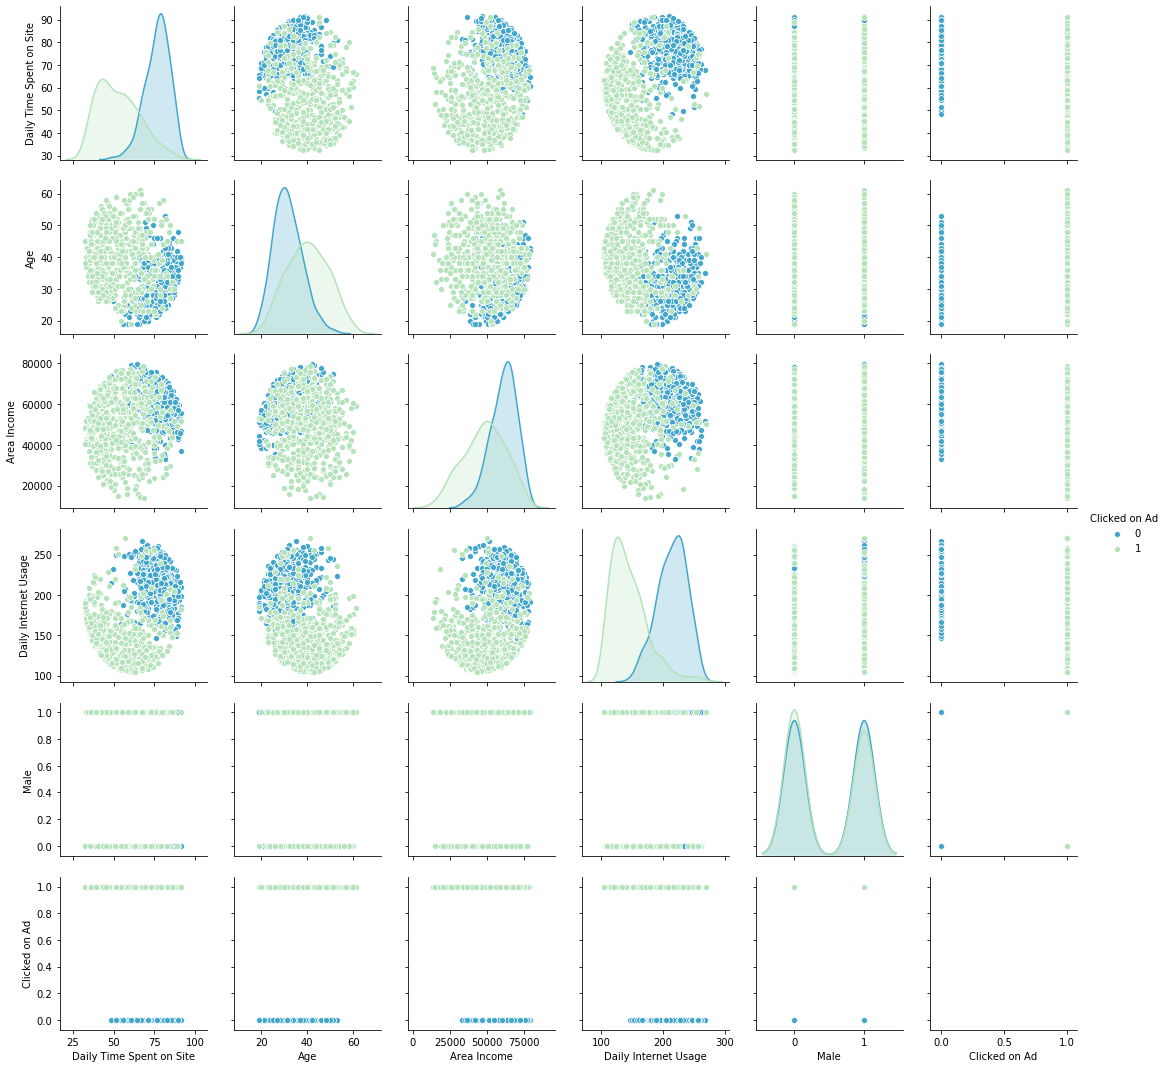

In [39]:
# finally, comapring all variables split by users that did not vs. did click on the ad in the test run
sns.pairplot(data=df, hue='Clicked on Ad', palette='GnBu_r')

User that clicked on the ad (green) seamingly spent less time on the site (graph row:1, column:1), have less daily internet usage (graph r:4, c:4) which is also supported by graph in row 4, column 1.
    It also seems like the more time the user spents on the site and the higher the area income, the less likely they were to click on the ad (graph r:3, c:1). 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [45]:
# after first insights, a logistic regression model will help to predict future useres
# first, string rows with multiple categorial values (as data has too few test users compared to features of these variables)
# as well as timestamp columns are droped (Country, Ad Topic Line, City) for simplicity
df_lr = df.drop(labels=['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
df_lr.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [51]:
# create df for predictor and response variable
X = df_lr.drop(labels=['Clicked on Ad'], axis=1)
y = df_lr['Clicked on Ad']

In [52]:
# create train and test data using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
# create logistic regression model object and train model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# get predictions and evaluate model (precision, recall, f1-score)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       147
           1       0.92      0.90      0.91       153

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [55]:
# create confusion matrix and extract true / false positives & negatives
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

(135, 12, 16, 137)

**With and f1-score of 0.91 (91% precision and 91% recall) our model predicts users behaviour quite well. 12 False Positives and 16 False Negtives are acceptable outcomes.**

**Trade off between recall and precision can be seen looking at metrics for both response types individually, with one being higher for each.**